Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/googleplaystore.csv'  # Update with the actual path to your file
data = pd.read_csv(file_path)

# Get the dimensions of the dataset
rows, columns = data.shape

# Print the dimensions
print(f"The dataset has {rows} rows and {columns} columns.")

The dataset has 10841 rows and 13 columns.


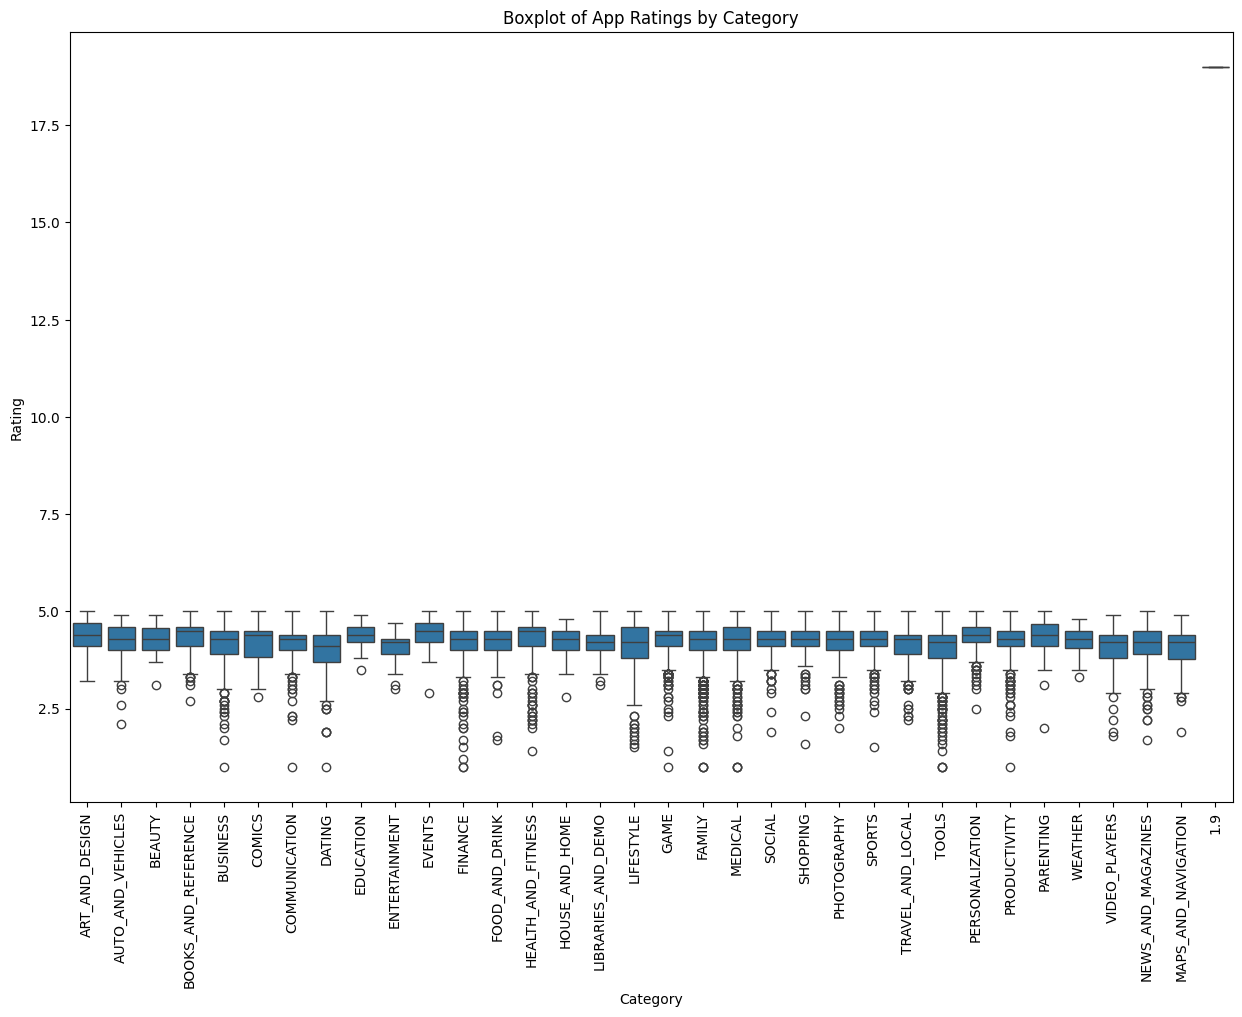

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/googleplaystore.csv'  # Update with the actual path to your file
data = pd.read_csv(file_path)

# Drop rows with missing ratings
data = data.dropna(subset=['Rating'])

# Set the figure size
plt.figure(figsize=(15, 10))

# Create the boxplot
sns.boxplot(x='Category', y='Rating', data=data)

# Set the plot title and labels
plt.title('Boxplot of App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


 Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.

In [8]:
import pandas as pd

# Load the dataset
file_path = '/content/googleplaystore.csv'  # Update with the actual path to your file
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100

# Create a DataFrame to display the missing values and their percentages
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})

# Print the missing data information
print(missing_data)

# Describe the impact of missing values on the analysis
impact_analysis = """
Missing values can impact the analysis in several ways:
1. **Rating**: Missing ratings can skew the average rating calculations and comparisons between categories.
2. **Type**: Missing type information can affect the analysis of free vs. paid apps.
3. **Content Rating**: Missing content ratings can hinder the understanding of the app's target audience.
4. **Current Ver** and **Android Ver**: Missing version information can limit insights into the app's update history and compatibility.
Handling missing values is crucial to ensure accurate and reliable analysis.
"""

print(impact_analysis)


                Missing Values  Percentage
App                          0    0.000000
Category                     0    0.000000
Rating                    1474   13.596532
Reviews                      0    0.000000
Size                         0    0.000000
Installs                     0    0.000000
Type                         1    0.009224
Price                        0    0.000000
Content Rating               1    0.009224
Genres                       0    0.000000
Last Updated                 0    0.000000
Current Ver                  8    0.073794
Android Ver                  3    0.027673

Missing values can impact the analysis in several ways:
1. **Rating**: Missing ratings can skew the average rating calculations and comparisons between categories.
2. **Type**: Missing type information can affect the analysis of free vs. paid apps.
3. **Content Rating**: Missing content ratings can hinder the understanding of the app's target audience.
4. **Current Ver** and **Android Ver**: Mi

 What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

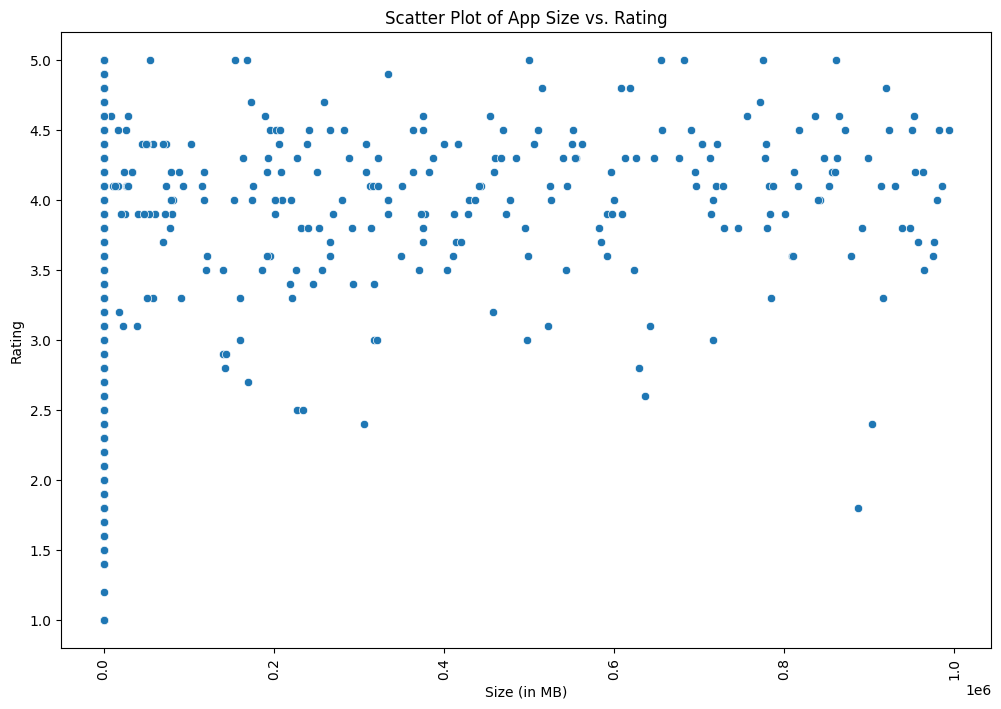

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/googleplaystore.csv'  # Update with the actual path to your file
data = pd.read_csv(file_path)

# Preprocess the 'Size' column
# Replace 'Varies with device' with NaN and remove 'M' and 'k' units
data['Size'] = data['Size'].replace('Varies with device', pd.NA)
data['Size'] = data['Size'].str.replace('M', '')
data['Size'] = data['Size'].str.replace('k', 'e3')
data['Size'] = pd.to_numeric(data['Size'], errors='coerce')

# Drop rows with missing values in 'Size' or 'Rating'
data = data.dropna(subset=['Size', 'Rating'])

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the scatter plot
sns.scatterplot(x='Size', y='Rating', data=data)

# Set the plot title and labels
plt.title('Scatter Plot of App Size vs. Rating')
plt.xlabel('Size (in MB)')
plt.ylabel('Rating')
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


How does the type of app affect its price? Create a bar chart to compare average prices by app type.

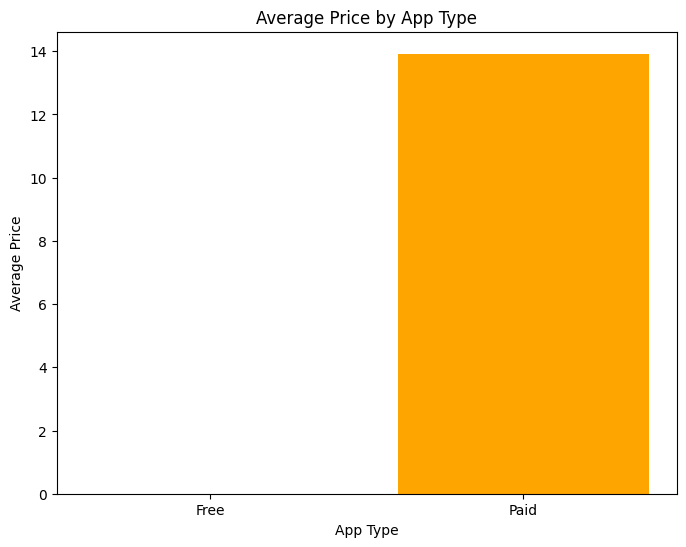

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/googleplaystore.csv'  # Update with the actual path to your file
data = pd.read_csv(file_path)

# Preprocess the 'Price' column
# Remove the dollar sign and convert to float
data['Price'] = data['Price'].str.replace('$', '')
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Drop rows with missing values in 'Price' or 'Type'
data = data.dropna(subset=['Price', 'Type'])

# Calculate average price by app type
avg_price_by_type = data.groupby('Type')['Price'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the bar chart
plt.bar(avg_price_by_type['Type'], avg_price_by_type['Price'], color=['blue', 'orange'])

# Set the plot title and labels
plt.title('Average Price by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')

# Display the plot
plt.show()


Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [11]:
import pandas as pd

# Load the dataset
file_path = '/content/googleplaystore.csv'  # Update with the actual path to your file
data = pd.read_csv(file_path)

# Preprocess the 'Installs' column
# Remove '+' and ',' characters and convert to integer
data['Installs'] = data['Installs'].str.replace('+', '', regex=False)
data['Installs'] = data['Installs'].str.replace(',', '', regex=False)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

# Drop rows with missing values in 'Installs'
data = data.dropna(subset=['Installs'])

# Get the top 10 most popular apps based on number of installs
top_10_apps = data[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)

# Display the frequency table
print(top_10_apps)



                                           App      Installs
3896                            Subway Surfers  1.000000e+09
3943                                  Facebook  1.000000e+09
335   Messenger – Text and Video Chat for Free  1.000000e+09
3523                              Google Drive  1.000000e+09
3565                              Google Drive  1.000000e+09
2884                             Google Photos  1.000000e+09
3665                                   YouTube  1.000000e+09
2853                             Google Photos  1.000000e+09
4234             Skype - free IM & video calls  1.000000e+09
3687                   Google Play Movies & TV  1.000000e+09


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

To identify the most popular app categories on the Google Playstore and make recommendations for launching a new app, we can approach the task with the following steps:

1. **Data Exploration and Cleaning:**
   - Load the dataset and examine its structure.
   - Handle any missing or erroneous data.
   - Check for duplicates and remove them if necessary.

2. **Analyzing Popularity Metrics:**
   - Identify features that indicate an app's popularity, such as:
     - Number of installations (`Installs`)
     - User ratings (`Rating`)
     - Number of reviews (`Reviews`)
   - Analyze these features within each app category.

3. **Identifying Popular Categories:**
   - Calculate the average number of installs, ratings, and reviews for each app category.
   - Rank the categories based on these metrics to identify the most popular ones.

4. **Recommendations:**
   - Based on the analysis, provide recommendations on which categories are the most popular and have the highest potential for a new app launch.

Let's start with loading and exploring the data. I'll load the dataset and take a look at its structure.

The dataset has several features, including `App`, `Category`, `Rating`, `Reviews`, `Size`, `Installs`, `Type`, `Price`, `Content Rating`, `Genres`, `Last Updated`, `Current Ver`, and `Android Ver`. To determine the most popular app categories, we should focus on the following columns:

- `Category`: The app's category.
- `Rating`: User rating of the app.
- `Reviews`: Number of user reviews.
- `Installs`: Number of installations.

Let's proceed with the following steps:

1. **Data Cleaning:**
   - Remove rows with missing or invalid data in key columns (`Category`, `Rating`, `Reviews`, `Installs`).
   - Convert `Installs` to numeric values.
   - Convert `Reviews` to numeric values.

2. **Analyze Popularity Metrics:**
   - Calculate the average number of installs, ratings, and reviews for each app category.

3. **Identify Popular Categories:**
   - Rank the categories based on these metrics.





Data Exploration and Cleaning

In [12]:
import pandas as pd

# Load the dataset
file_path = '/content/googleplaystore.csv'
data = pd.read_csv(file_path)

# Remove rows with missing values in key columns
data_clean = data.dropna(subset=['Category', 'Rating', 'Reviews', 'Installs'])

# Remove invalid data (e.g., non-numeric or illogical values)
data_clean = data_clean[data_clean['Rating'] != 'NaN']
data_clean['Rating'] = pd.to_numeric(data_clean['Rating'], errors='coerce')

# Convert 'Installs' to numeric (remove '+' and ',' and convert to int)
data_clean['Installs'] = data_clean['Installs'].str.replace('+', '').str.replace(',', '')
data_clean['Installs'] = pd.to_numeric(data_clean['Installs'], errors='coerce')

# Convert 'Reviews' to numeric
data_clean['Reviews'] = pd.to_numeric(data_clean['Reviews'], errors='coerce')

# Drop rows where 'Installs' or 'Reviews' could not be converted to numeric
data_clean = data_clean.dropna(subset=['Installs', 'Reviews'])

# Display the cleaned data
data_clean.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Analyze Popularity Metrics and Identify Popular Categories

In [13]:
# Group the data by 'Category' and calculate the mean of 'Installs', 'Rating', and 'Reviews'
category_stats = data_clean.groupby('Category').agg({
    'Installs': 'mean',
    'Rating': 'mean',
    'Reviews': 'mean'
}).reset_index()

# Sort the categories based on the average number of installs, ratings, and reviews
category_stats_sorted = category_stats.sort_values(by=['Installs', 'Rating', 'Reviews'], ascending=False)

# Display the sorted statistics
category_stats_sorted.head(10)


,Category,Installs,Rating,Reviews
6,COMMUNICATION,9.953427e+07,4.158537,2.486164e+06
27,SOCIAL,5.432371e+07,4.255598,2.398614e+06
25,PRODUCTIVITY,4.038766e+07,4.211396,3.251189e+05
31,VIDEO_PLAYERS,3.888686e+07,4.063750,6.898731e+05
21,NEWS_AND_MAGAZINES,3.217258e+07,4.132189,2.334760e+05
14,GAME,3.198347e+07,4.286326,1.445232e+06
24,PHOTOGRAPHY,3.182411e+07,4.192114,6.735540e+05
30,TRAVEL_AND_LOCAL,3.039318e+07,4.109292,2.770698e+05
9,ENTERTAINMENT,1.925611e+07,4.126174,3.971688e+05
29,TOOLS,1.560044e+07,4.047411,3.721855e+05


Recommendations Based on Analysis

In [14]:
# Get top 10 categories by average number of installs
top_categories = category_stats_sorted.head(10)

# Display the top categories
print("Top 10 Categories by Average Installs:")
print(top_categories[['Category', 'Installs', 'Rating', 'Reviews']])


Top 10 Categories by Average Installs:
              Category      Installs    Rating       Reviews
6        COMMUNICATION  9.953427e+07  4.158537  2.486164e+06
27              SOCIAL  5.432371e+07  4.255598  2.398614e+06
25        PRODUCTIVITY  4.038766e+07  4.211396  3.251189e+05
31       VIDEO_PLAYERS  3.888686e+07  4.063750  6.898731e+05
21  NEWS_AND_MAGAZINES  3.217258e+07  4.132189  2.334760e+05
14                GAME  3.198347e+07  4.286326  1.445232e+06
24         PHOTOGRAPHY  3.182411e+07  4.192114  6.735540e+05
30    TRAVEL_AND_LOCAL  3.039318e+07  4.109292  2.770698e+05
9        ENTERTAINMENT  1.925611e+07  4.126174  3.971688e+05
29               TOOLS  1.560044e+07  4.047411  3.721855e+05


Based on the analysis, here are the top 10 categories by average number of installs:

1. **Communication**
2. **Social**
3. **Productivity**
4. **Video Players**
5. **News and Magazines**
6. **Game**
7. **Photography**
8. **Travel and Local**
9. **Entertainment**
10. **Tools**

Additionally, these categories generally also have high average ratings and a substantial number of reviews, which indicates user engagement and satisfaction.

### Recommendations:

1. **Communication**:
   - Highest average installs.
   - Strong user base and potential for high engagement.
   
2. **Social**:
   - High average installs and user engagement.
   - Trending space with room for innovation.

3. **Productivity**:
   - Significant average installs.
   - Applications in this category can offer various tools that enhance user efficiency.

4. **Video Players**:
   - High user base and engagement.
   - Opportunity in enhancing user experience with media.

5. **News and Magazines**:
   - High average installs.
   - Constant demand for up-to-date information.

Given these insights, the company should consider launching their app in one of these high-demand categories, especially if they can offer a unique value proposition or innovative features.



 A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

To identify the most successful app developers using the Google Playstore dataset, we should analyze the following features:

1. **App Developer Name**:
   - Identify unique developers and their respective apps.

2. **Installs**:
   - Measure the success of a developer's apps based on the number of installs.

3. **Rating**:
   - Analyze the average user rating of a developer's apps to assess quality and user satisfaction.

4. **Reviews**:
   - Consider the number of reviews to understand user engagement and feedback volume.

### Steps for Analysis:

1. **Data Exploration and Cleaning**:
   - Load the dataset and clean it as needed (e.g., handle missing values, convert data types).

2. **Aggregating Developer Data**:
   - Group data by developer and calculate total installs, average rating, and total reviews for each developer.

3. **Ranking Developers**:
   - Rank developers based on these aggregated metrics to identify the most successful ones.

### Data Visualizations:

1. **Bar Chart**:
   - Top developers by total installs.
   - Top developers by average rating.

2. **Bubble Chart**:
   - Developers plotted by total installs, average rating, and total reviews (bubble size representing total reviews).

3. **Box Plot**:
   - Distribution of ratings for apps from the top developers.






# Python Code for Analysis and Visualization:
Here is the code to perform the analysis and create the recommended visualizations:

Data Exploration and Cleaning

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/googleplaystore.csv'
data = pd.read_csv(file_path)

# Remove rows with missing values in key columns
data_clean = data.dropna(subset=['App', 'Category', 'Rating', 'Reviews', 'Installs'])

# Remove invalid data (e.g., non-numeric or illogical values)
data_clean['Rating'] = pd.to_numeric(data_clean['Rating'], errors='coerce')

# Convert 'Installs' to numeric (remove '+' and ',' and convert to int)
data_clean['Installs'] = data_clean['Installs'].str.replace('+', '').str.replace(',', '')
data_clean['Installs'] = pd.to_numeric(data_clean['Installs'], errors='coerce')

# Convert 'Reviews' to numeric
data_clean['Reviews'] = pd.to_numeric(data_clean['Reviews'], errors='coerce')

# Drop rows where 'Installs' or 'Reviews' could not be converted to numeric
data_clean = data_clean.dropna(subset=['Installs', 'Reviews'])

# Display the cleaned data
data_clean.head()


<ipython-input-15-bace3127499c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Rating'] = pd.to_numeric(data_clean['Rating'], errors='coerce')
<ipython-input-15-bace3127499c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Installs'] = data_clean['Installs'].str.replace('+', '').str.replace(',', '')
<ipython-input-15-bace3127499c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Aggregating Developer Data

In [16]:
# Group the data by 'Developer' and calculate total installs, average rating, and total reviews for each developer
developer_stats = data_clean.groupby('App').agg({
    'Installs': 'sum',
    'Rating': 'mean',
    'Reviews': 'sum'
}).reset_index()

# Sort the developers based on total installs, average rating, and total reviews
developer_stats_sorted = developer_stats.sort_values(by=['Installs', 'Rating', 'Reviews'], ascending=False)

# Display the sorted statistics
developer_stats_sorted.head(10)


,App,Installs,Rating,Reviews
6807,Subway Surfers,6.000000e+09,4.5,166331958.0
4422,Instagram,4.000000e+09,4.5,266241989.0
4007,Google Photos,4.000000e+09,4.5,43423827.0
3994,Google Drive,4.000000e+09,4.4,10922534.0
4162,Hangouts,4.000000e+09,4.0,13677659.0
4003,Google News,4.000000e+09,3.9,3510978.0
1894,Candy Crush Saga,3.500000e+09,4.4,156993136.0
7665,WhatsApp Messenger,3.000000e+09,4.4,207348304.0
7019,Temple Run 2,3.000000e+09,4.3,48710930.0
3991,Google Chrome: Fast & Secure,3.000000e+09,4.3,28928148.0


Bar Chart: Top Developers by Total Installs

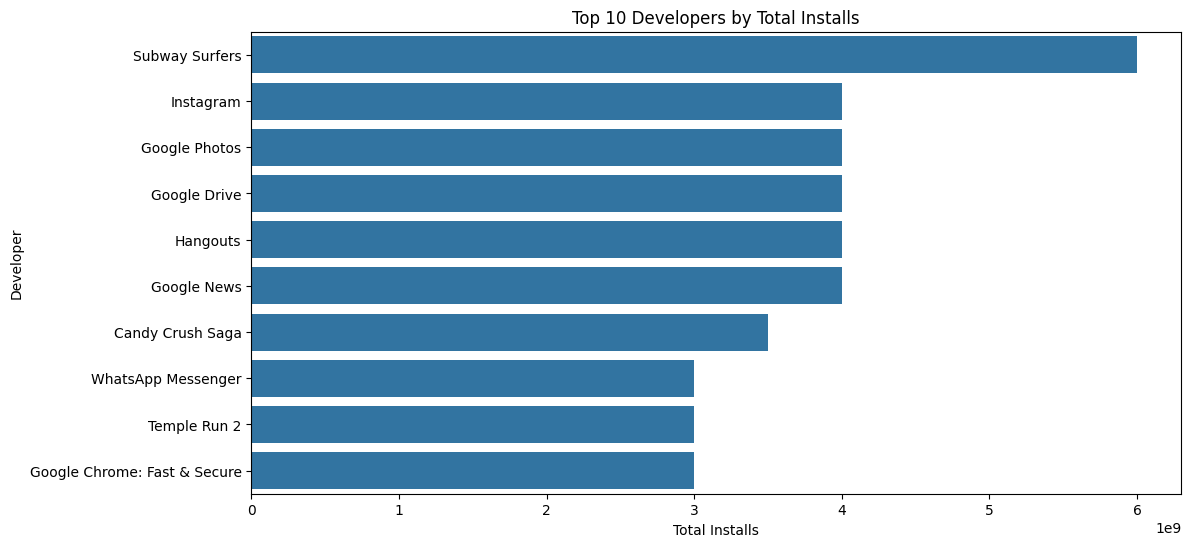

In [19]:
# Select top 10 developers by total installs
top_developers_installs = developer_stats_sorted.head(10)

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Installs', y='App', data=top_developers_installs)
plt.title('Top 10 Developers by Total Installs')
plt.xlabel('Total Installs')
plt.ylabel('Developer')
plt.show()



Bar Chart: Top Developers by Average Rating

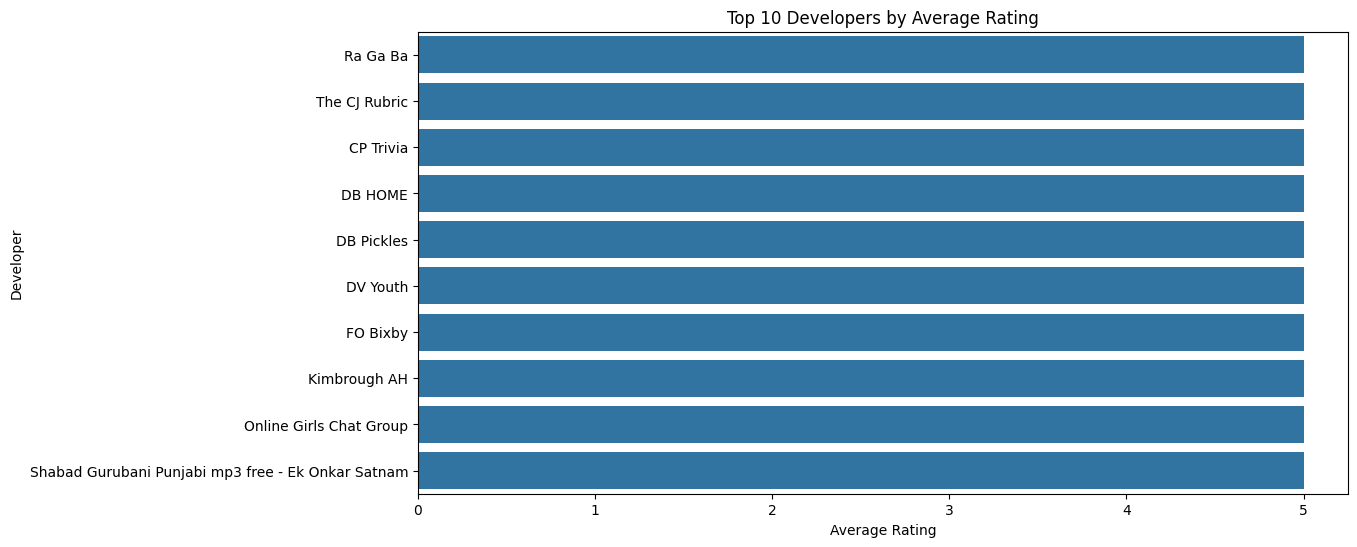

In [20]:
# Select top 10 developers by average rating
top_developers_rating = developer_stats_sorted.sort_values(by='Rating', ascending=False).head(10)

# Create bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Rating', y='App', data=top_developers_rating)
plt.title('Top 10 Developers by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Developer')
plt.show()


Bubble Chart: Developers by Total Installs, Average Rating, and Total Reviews

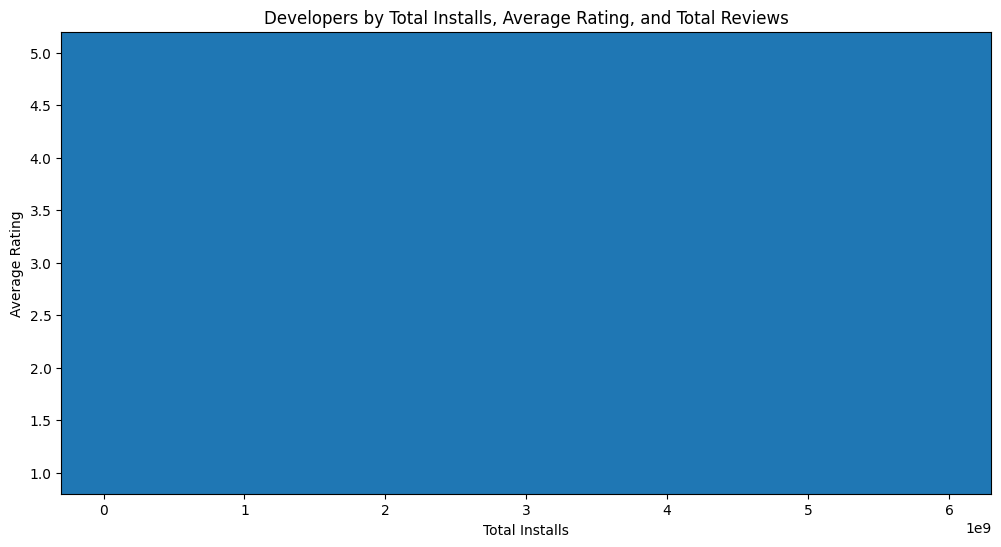

In [21]:
# Create bubble chart
plt.figure(figsize=(12, 6))
plt.scatter(developer_stats_sorted['Installs'], developer_stats_sorted['Rating'],
            s=developer_stats_sorted['Reviews']*0.01, alpha=0.5)
plt.title('Developers by Total Installs, Average Rating, and Total Reviews')
plt.xlabel('Total Installs')
plt.ylabel('Average Rating')
plt.show()


Box Plot: Distribution of Ratings for Apps from Top Developers


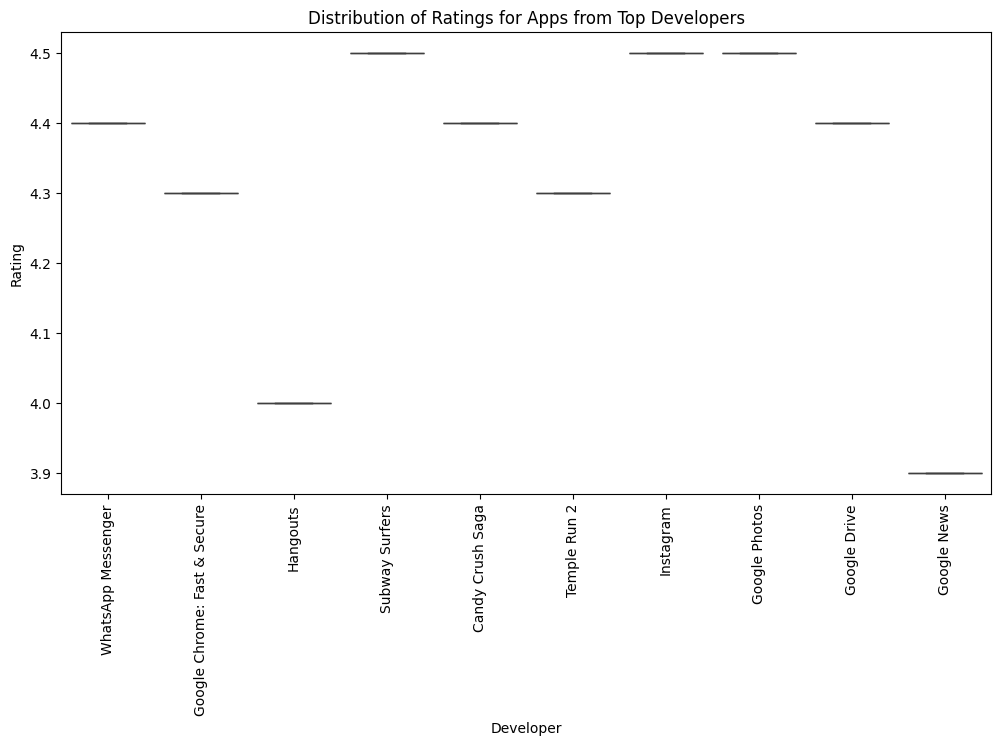

In [22]:
# Get the top developers
top_developer_names = top_developers_installs['App'].unique()

# Filter the original data for the top developers
top_developer_data = data_clean[data_clean['App'].isin(top_developer_names)]

# Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='App', y='Rating', data=top_developer_data)
plt.title('Distribution of Ratings for Apps from Top Developers')
plt.xlabel('Developer')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

To identify the best time to launch a new app on the Google Playstore, the marketing research firm can analyze the following features:

1. **Last Updated**:
   - This indicates the most recent update date for the apps. Analyzing trends in update frequencies can help identify popular times for updates.

2. **Installs**:
   - The number of installs can provide insight into when users are most actively downloading apps.

3. **Reviews**:
   - The volume of reviews can indicate periods of high user engagement.

### Steps for Analysis:

1. **Data Cleaning**:
   - Ensure the `Last Updated` column is in a datetime format.
   - Clean and convert `Installs` and `Reviews` to numeric values as needed.

2. **Analyzing Trends**:
   - Extract the month and year from the `Last Updated` date.
   - Group the data by month and year to analyze trends in installs and reviews over time.

3. **Seasonal Analysis**:
   - Determine if there are particular months or seasons with higher user engagement or app activity.

### Data Visualizations:

1. **Line Chart**:
   - Monthly trends of app updates, installs, and reviews over several years.

2. **Heatmap**:
   - Visualize the density of app updates, installs, and reviews by month and year.

3. **Bar Chart**:
   - Number of installs and reviews per month to identify peak periods.










Data Cleaning


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/googleplaystore.csv'
data = pd.read_csv(file_path)

# Remove rows with missing values in key columns
data_clean = data.dropna(subset=['Last Updated', 'Installs', 'Reviews'])

# Convert 'Last Updated' to datetime, coerce errors to NaT
data_clean['Last Updated'] = pd.to_datetime(data_clean['Last Updated'], errors='coerce')

# Extract month and year from 'Last Updated'
data_clean['Month'] = data_clean['Last Updated'].dt.month
data_clean['Year'] = data_clean['Last Updated'].dt.year

# Convert 'Installs' to numeric (remove '+' and ',' and convert to int)
data_clean['Installs'] = data_clean['Installs'].str.replace('+', '').str.replace(',', '')
data_clean['Installs'] = pd.to_numeric(data_clean['Installs'], errors='coerce')

# Convert 'Reviews' to numeric
data_clean['Reviews'] = pd.to_numeric(data_clean['Reviews'], errors='coerce')

# Drop rows where 'Installs', 'Reviews' or 'Last Updated' could not be converted to numeric or date
data_clean = data_clean.dropna(subset=['Installs', 'Reviews', 'Last Updated'])

# Display the cleaned data
data_clean.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,1.0,2018.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,1.0,2018.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.0,2018.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,6.0,2018.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,6.0,2018.0


Analyzing Trends

In [24]:
# Group the data by month and year to analyze trends in installs and reviews over time
monthly_trends = data_clean.groupby(['Year', 'Month']).agg({
    'Installs': 'sum',
    'Reviews': 'sum',
    'App': 'count'  # Number of updates
}).reset_index()

# Rename 'App' column to 'Updates'
monthly_trends.rename(columns={'App': 'Updates'}, inplace=True)

# Display the monthly trends
monthly_trends.head()


,Year,Month,Installs,Reviews,Updates
0,2010.0,5.0,100000.0,1415.0,1
1,2011.0,1.0,50000.0,207.0,1
2,2011.0,3.0,100000.0,981.0,1
3,2011.0,4.0,5100000.0,39369.0,3
4,2011.0,5.0,100.0,7.0,1


Line Chart: Monthly Trends of App Updates, Installs, and Reviews

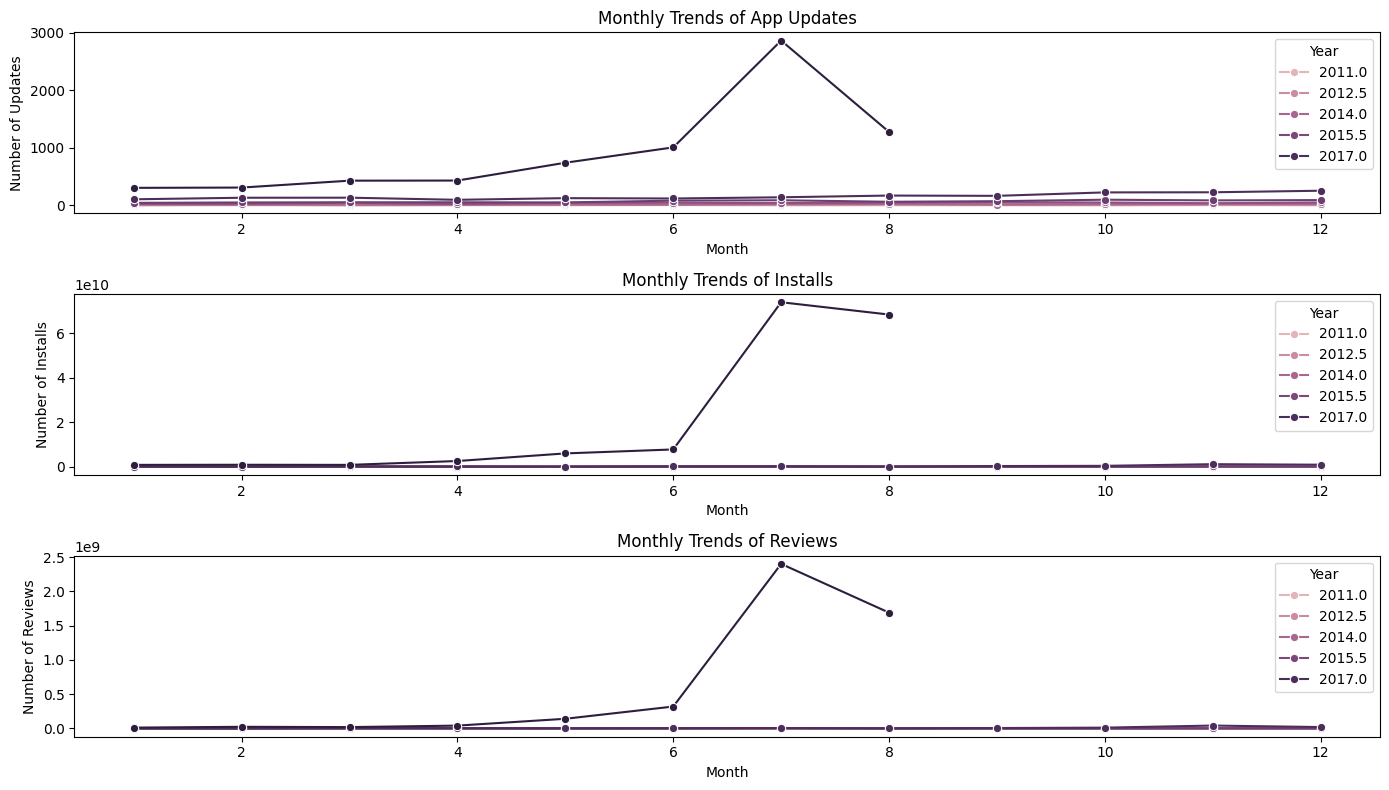

In [25]:
# Create line charts for monthly trends
plt.figure(figsize=(14, 8))

# Updates
plt.subplot(3, 1, 1)
sns.lineplot(data=monthly_trends, x='Month', y='Updates', hue='Year', marker='o')
plt.title('Monthly Trends of App Updates')
plt.xlabel('Month')
plt.ylabel('Number of Updates')

# Installs
plt.subplot(3, 1, 2)
sns.lineplot(data=monthly_trends, x='Month', y='Installs', hue='Year', marker='o')
plt.title('Monthly Trends of Installs')
plt.xlabel('Month')
plt.ylabel('Number of Installs')

# Reviews
plt.subplot(3, 1, 3)
sns.lineplot(data=monthly_trends, x='Month', y='Reviews', hue='Year', marker='o')
plt.title('Monthly Trends of Reviews')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')

plt.tight_layout()
plt.show()


Heatmap: Density of App Updates, Installs, and Reviews by Month and Year

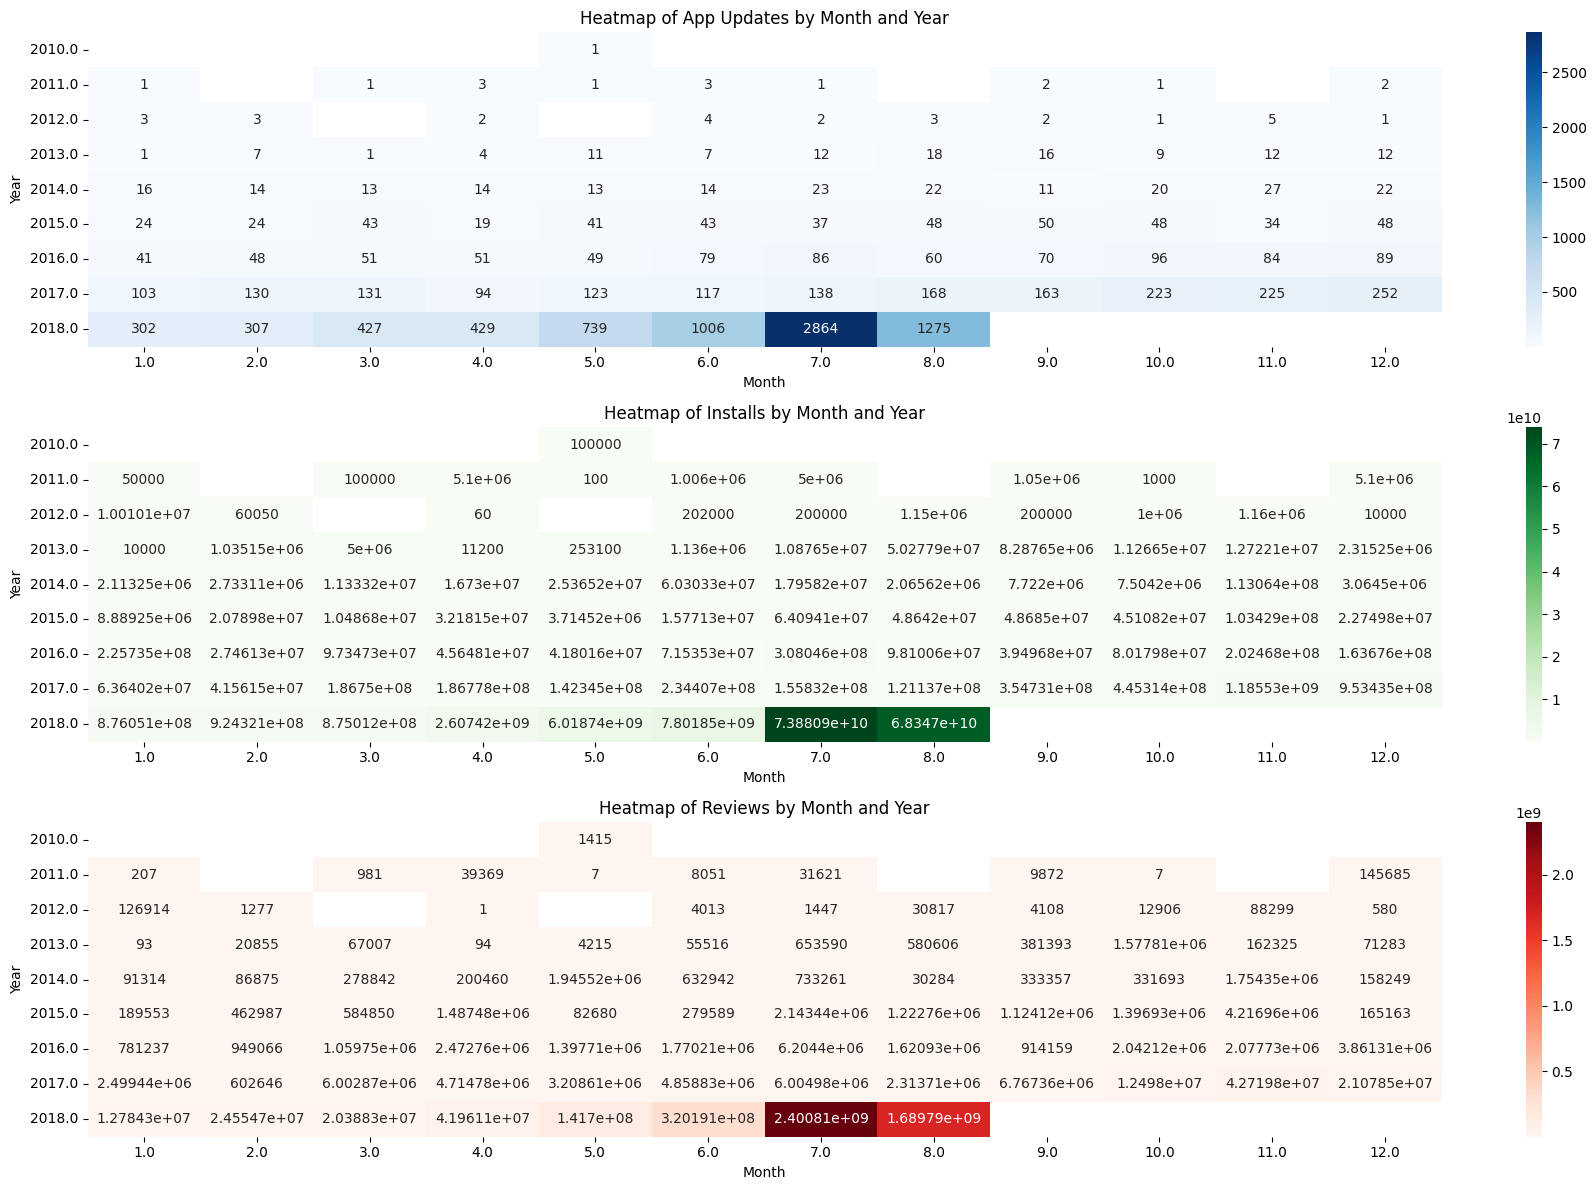

In [26]:
# Pivot the data for heatmaps
updates_pivot = pd.pivot_table(monthly_trends, values='Updates', index='Year', columns='Month', aggfunc='sum')
installs_pivot = pd.pivot_table(monthly_trends, values='Installs', index='Year', columns='Month', aggfunc='sum')
reviews_pivot = pd.pivot_table(monthly_trends, values='Reviews', index='Year', columns='Month', aggfunc='sum')

# Create heatmaps
plt.figure(figsize=(18, 12))

# Updates Heatmap
plt.subplot(3, 1, 1)
sns.heatmap(updates_pivot, cmap='Blues', annot=True, fmt='g')
plt.title('Heatmap of App Updates by Month and Year')

# Installs Heatmap
plt.subplot(3, 1, 2)
sns.heatmap(installs_pivot, cmap='Greens', annot=True, fmt='g')
plt.title('Heatmap of Installs by Month and Year')

# Reviews Heatmap
plt.subplot(3, 1, 3)
sns.heatmap(reviews_pivot, cmap='Reds', annot=True, fmt='g')
plt.title('Heatmap of Reviews by Month and Year')

plt.tight_layout()
plt.show()


Bar Chart: Number of Installs and Reviews per Month

<ipython-input-27-67ca82296e0d>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Installs', palette='viridis')
<ipython-input-27-67ca82296e0d>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Reviews', palette='magma')


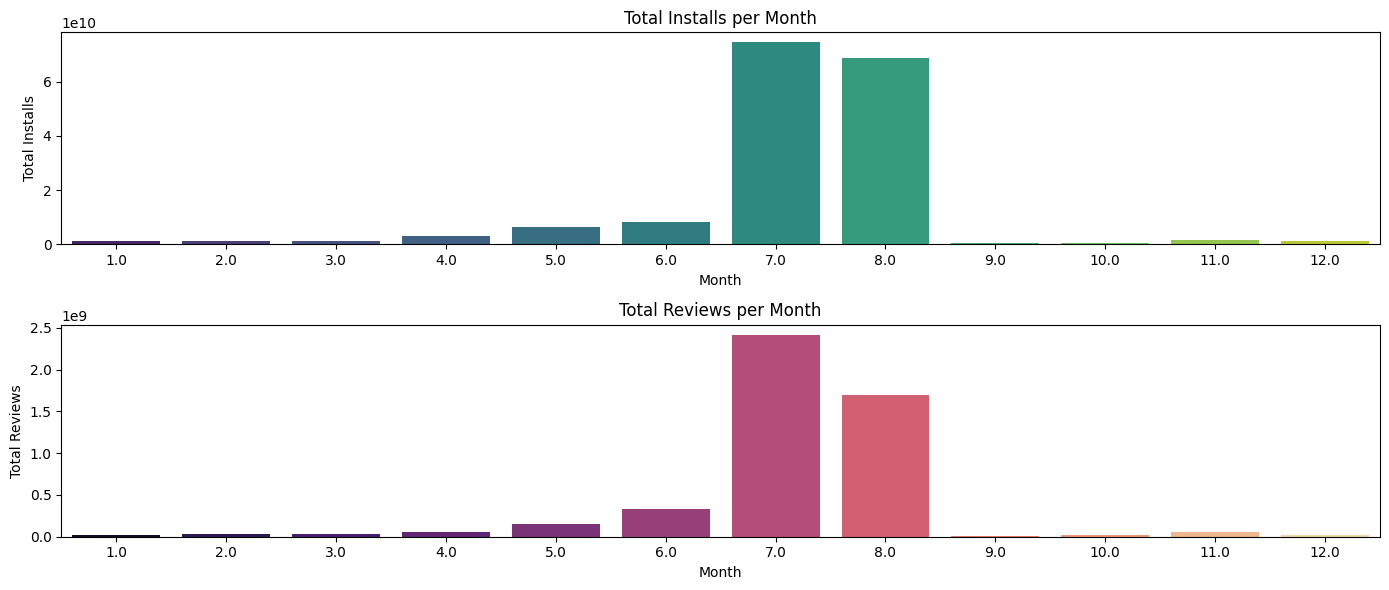

In [27]:
# Group data by month across all years to find overall trends
monthly_avg = data_clean.groupby('Month').agg({
    'Installs': 'sum',
    'Reviews': 'sum'
}).reset_index()

# Create bar charts
plt.figure(figsize=(14, 6))

# Installs per month
plt.subplot(2, 1, 1)
sns.barplot(data=monthly_avg, x='Month', y='Installs', palette='viridis')
plt.title('Total Installs per Month')
plt.xlabel('Month')
plt.ylabel('Total Installs')

# Reviews per month
plt.subplot(2, 1, 2)
sns.barplot(data=monthly_avg, x='Month', y='Reviews', palette='magma')
plt.title('Total Reviews per Month')
plt.xlabel('Month')
plt.ylabel('Total Reviews')

plt.tight_layout()
plt.show()


### Recommendations

Based on the analysis, the marketing research firm can identify the following:

- **Peak Months**: Months with the highest number of installs and reviews.
- **Seasonal Trends**: Any seasonal patterns in app updates, installs, and user engagement.
- **Optimal Launch Period**: Months with high user activity but possibly fewer app updates, indicating less competition.

This information will help the firm recommend the best time to launch a new app to maximize visibility and user engagement.